In [226]:
import numpy as np
import pandas as pd
#read the titanic-passengers.csv file
df = pd.read_csv("titanic-passengers.csv", sep =';')
#show the head of the titanic-passengers file
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [227]:
#reading the columns
df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [228]:
#show the informations of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [229]:
#check the sum of the missing values with isnull()
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [230]:
# replace the missing values in the differents columns
#replace the missing values of age by the mode()
df.fillna({'Age': df['Age'].mode()[0]}, inplace=True)
#replace the missing values of 'embarked' by the most represented value
#look fisrt 'Emarked' value_counts
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [231]:
#S is beingt the modalities the mos represented, we will replace the NAN by in the 'Embarked' category
df['Embarked'].fillna({'Embarked' : 'S'}, inplace=True)

In [232]:
#the 'Cabin' column representing too many values for the distribution, we will done a larger grouping to be able 
#add dummies afterwards large pour pouvaoir aprés
#observation to values of  'Cabin'
df['Cabin'].value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
E101           3
C22 C26        3
              ..
B71            1
D28            1
C70            1
C45            1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [233]:
#replace the missing values by a fictious value
df['Cabin'].fillna('X', inplace=True)
df['Cabin'].value_counts()

X              687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
B71              1
D28              1
C70              1
A31              1
C128             1
Name: Cabin, Length: 148, dtype: int64

In [234]:
#let's do grouping  terms of 'cabin' taking only the first caracter of each valuer
df['Cabin'] = df['Cabin'].str[0]

In [235]:
df['Cabin'].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [236]:
#drop the columns 'Name' et 'Ticket' and work only on the other columns 
df.drop(columns=["Name", "Ticket"], inplace=True)

In [237]:
#Encode our variable
survived_title = {
    "Survived" : {
        "Yes" : 1,
        "No" : 0
    }
}
#replace the values of 'Survived' by the encoded variable
df.replace(survived_title, inplace=True)
#df.info()

In [238]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,343,0,2,male,28.0,0,0,13.0000,X,S
1,76,0,3,male,25.0,0,0,7.6500,F,S
2,641,0,3,male,20.0,0,0,7.8542,X,S
3,568,0,3,female,29.0,0,4,21.0750,X,S
4,672,0,1,male,31.0,1,0,52.0000,B,S


In [239]:
#creating of dummies
dummies = ['Sex', 'Cabin', 'Embarked']
dummies_data = pd.get_dummies(df[dummies])

In [240]:
dummies_data.shape

(891, 14)

In [241]:
#concatenate the arrays
df = pd.concat([df, dummies_data], axis = 1)
#drop the list dummies in the array df
df.drop(dummies, axis = 1, inplace=True)

In [242]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_X,Embarked_C,Embarked_Q,Embarked_S
0,343,0,2,28.0,0,0,13.0000,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,76,0,3,25.0,0,0,7.6500,0,1,0,...,0,0,0,1,0,0,0,0,0,1
2,641,0,3,20.0,0,0,7.8542,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,568,0,3,29.0,0,4,21.0750,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,672,0,1,31.0,1,0,52.0000,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [243]:
#Now we will do the scalling feature 'Fare' et 'Age'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [244]:
#isolate now our variable target of features
Y = df['Survived']
X = df.drop('Survived', axis=1)

In [245]:
#let's apply now the logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state= 0)
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
Y_pred

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

In [246]:
print('Accuracy = {: .2f}'.format(log_reg.score(X_test, Y_test)))

Accuracy =  0.83


<AxesSubplot:xlabel='predicted', ylabel='Actual'>

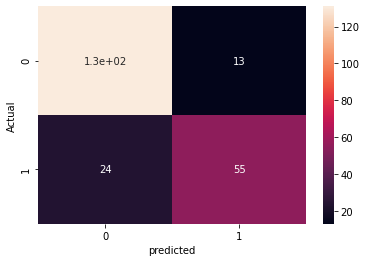

In [247]:
#using the confusion matrix to validate our model
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames = ['Actual'], colnames = ['predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [248]:
print(confusion_matrix)

predicted    0   1
Actual            
0          131  13
1           24  55


In [249]:
print("Accuracy = ", (131 + 55)/(131 + 13 + 55))
print("Recall = ", 131/(131 + 24))
print("precision = ", 131/(131 + 13))

Accuracy =  0.9346733668341709
Recall =  0.8451612903225807
precision =  0.9097222222222222


### Interprétation
Nous avons fait 93% de prédiction correctes à partir des observations

Sur tous les survivants, nous avons eu raison de 84%

Sur tous les survivants que nous avons prédit, nous avons réellement réussi à 90%

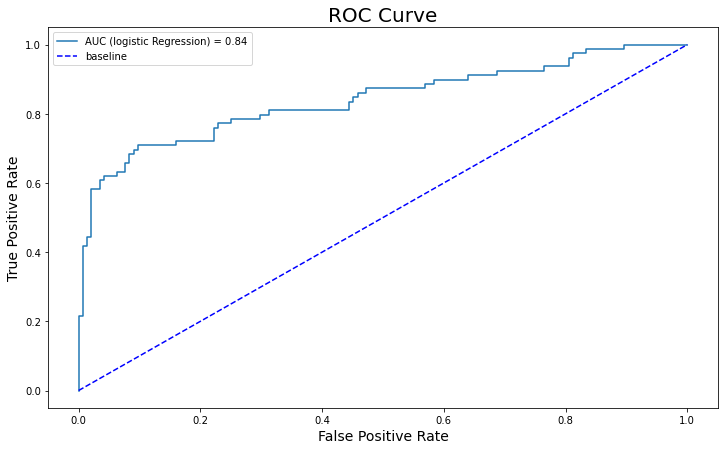

In [250]:
#using of the ROC/AUC matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
#from xgboost import XGBClassier

probs = log_reg.predict_proba(X_test)[:,1]
auc = roc_auc_score(Y_test, probs)

fpr, tpr, thresholds = roc_curve(Y_test, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (logistic Regression) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label="baseline")
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend()


### Interprétation
Notre model ayant un AUC > 0.7, donc on peut le classer comme bon.